<a href="https://colab.research.google.com/github/azizdhaoui/Stock-Revenue-Data-Of-Tesla/blob/main/Analyzing_Historical_Stock_Revenue_Data_Of_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot stock data
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to scrape revenue data
def scrape_revenue(url, table_class):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    html_data = response.text
    soup = BeautifulSoup(html_data, "html.parser")
    table = soup.find("table", {"class": table_class})

    if table is None:
        raise ValueError(f"Could not find the table with class '{table_class}'.")

    rows = table.find_all("tr")
    revenue_data = pd.DataFrame(columns=["Date", "Revenue"])

    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text
            revenue = cols[1].text.replace("$", "").replace(",", "")
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            revenue_data = pd.concat([revenue_data, new_row], ignore_index=True)

    return revenue_data



In [19]:

# Question 1: Extract Tesla Stock Data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data (First 5 Rows):")
print(tesla_data.head(5))



Tesla Stock Data (First 5 Rows):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [20]:
# Question 2: Extract Tesla Revenue Data
tesla_revenue_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_revenue = scrape_revenue(tesla_revenue_url, "historical_data_table")
print("\nTesla Revenue Data (Last 5 Rows):")
print(tesla_revenue.tail(5))




Tesla Revenue Data (Last 5 Rows):
    Date Revenue
10  2013    2013
11  2012     413
12  2011     204
13  2010     117
14  2009     112


In [21]:
# Question 3: Extract GameStop Stock Data
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
print("\nGameStop Stock Data (First 5 Rows):")
print(gme_data.head(5))



GameStop Stock Data (First 5 Rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [22]:

# Question 4: Extract GameStop Revenue Data
gme_revenue_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_revenue = scrape_revenue(gme_revenue_url, "historical_data_table")
print("\nGameStop Revenue Data (Last 5 Rows):")
print(gme_revenue.tail(5))



GameStop Revenue Data (Last 5 Rows):
    Date Revenue
11  2013    8887
12  2012    9551
13  2011    9474
14  2010    9078
15  2009    8806



Plotting Tesla Stock Graph...


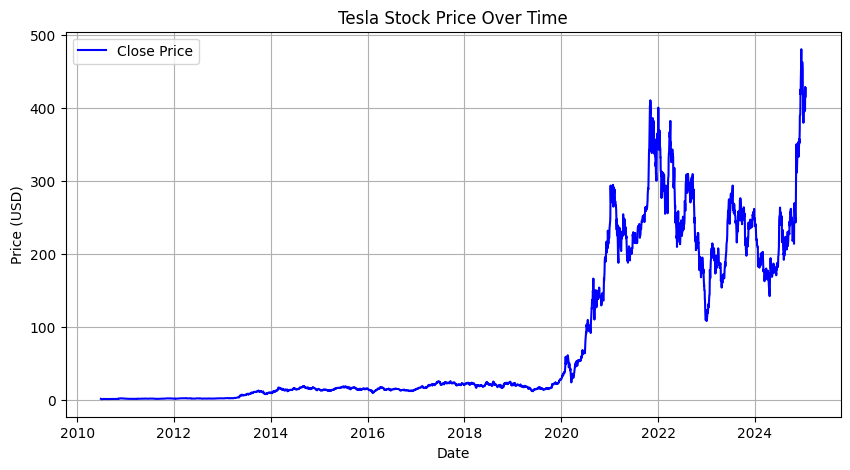

In [23]:

# Question 5: Plot Tesla Stock Graph
print("\nPlotting Tesla Stock Graph...")
make_graph(tesla_data, "Tesla Stock Price Over Time")




Plotting GameStop Stock Graph...


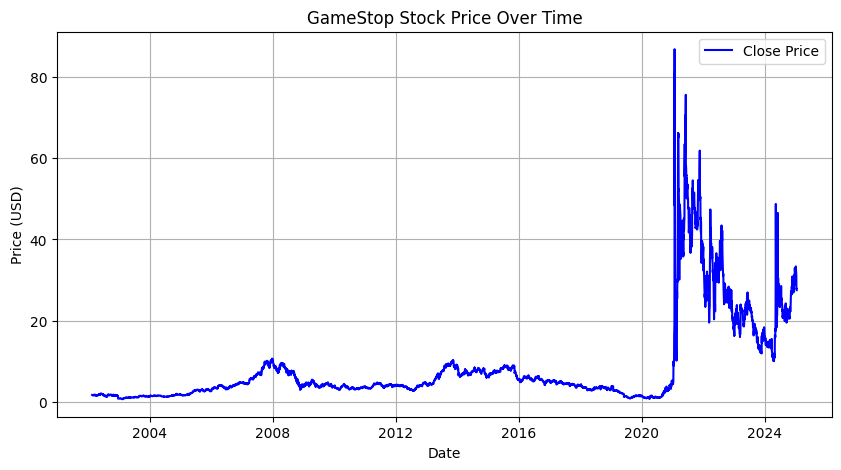

In [24]:
# Question 6: Plot GameStop Stock Graph
print("\nPlotting GameStop Stock Graph...")
make_graph(gme_data, "GameStop Stock Price Over Time")